In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5.0,4.0,NaN,NaN,7.0,10.0,NaN,NaN,1
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6.0,NaN,NaN,NaN,3.0,NaN,3.0,7.0,1
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	33
float64		column 2	33
float64		column 3	301
float64		column 4	103
float64		column 5	231
float64		column 6	198
float64		column 7	169
float64		column 8	136
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,650.000000,650.000000,382.000000,580.000000,452.000000,485.000000,514.000000,547.000000,683.000000
mean,4.427692,3.110769,2.918848,2.684483,3.055310,3.521649,3.359922,2.723949,1.603221
std,2.816718,3.048156,2.780927,2.747038,2.021842,3.638926,2.424861,2.908657,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,4.000000,3.000000,3.000000,6.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

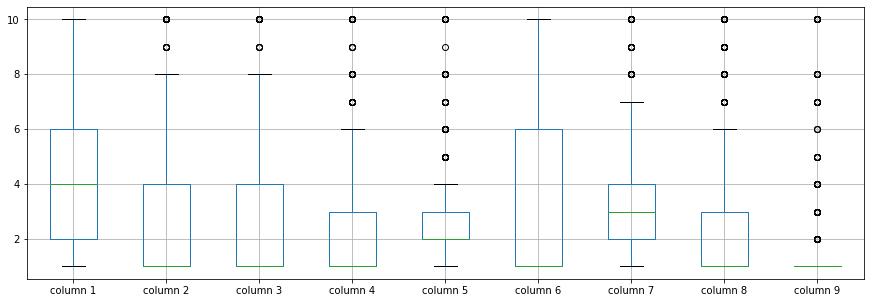

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.427692
column 2    3.110769
column 3    2.918848
column 4    2.684483
column 5    3.055310
column 6    3.521649
column 7    3.359922
column 8    2.723949
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.643627,0.615990,0.469930,0.460358,0.584623,0.526043,0.488875,0.344783
column 2,0.643627,1.000000,0.911868,0.701079,0.686482,0.707503,0.752363,0.669061,0.466067
column 3,0.615990,0.911868,1.000000,0.654151,0.666146,0.733758,0.708247,0.640059,0.404966
column 4,0.469930,0.701079,0.654151,1.000000,0.475151,0.648893,0.643905,0.545456,0.386885
column 5,0.460358,0.686482,0.666146,0.475151,1.000000,0.612598,0.587670,0.584042,0.364614
column 6,0.584623,0.707503,0.733758,0.648893,0.612598,1.000000,0.708090,0.575908,0.307926
column 7,0.526043,0.752363,0.708247,0.643905,0.587670,0.708090,1.000000,0.657877,0.384295
column 8,0.488875,0.669061,0.640059,0.545456,0.584042,0.575908,0.657877,1.000000,0.415691
column 9,0.344783,0.466067,0.404966,0.386885,0.364614,0.307926,0.384295,0.415691,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+99,9+99+99,9+99+99,9+99+99+99+99,9+99+99+99,9+99+99,9+99,9], vae_layer = False, seed = 990)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.217154888879683
Epoch: 1 , loss: 28.325622104463122
Epoch: 2 , loss: 28.216106414794922
Epoch: 3 , loss: 27.1413258370899
Epoch: 4 , loss: 24.91917555672782
Epoch: 5 , loss: 24.055783794039773
Epoch: 6 , loss: 23.63465847287859
Epoch: 7 , loss: 23.22549261365618
Epoch: 8 , loss: 22.819399879092263
Epoch: 9 , loss: 22.65816963286627
Epoch: 10 , loss: 22.480932599022275
Epoch: 11 , loss: 22.55247399920509
Epoch: 12 , loss: 22.218247572580974
Epoch: 13 , loss: 22.256954261234828
Epoch: 14 , loss: 21.61745348430815
Epoch: 15 , loss: 22.280941372825986
Epoch: 16 , loss: 22.80903198605492
Epoch: 17 , loss: 22.360722314743768
Epoch: 18 , loss: 21.938361985342844
Epoch: 19 , loss: 22.46310329437256
Epoch: 20 , loss: 22.127368154979887
Epoch: 21 , loss: 21.349673362005326
Epoch: 22 , loss: 21.720754805065337
Epoch: 23 , loss: 21.818379856291273
Epoch: 24 , loss: 21.454401084354945
Epoch: 25 , loss: 21.9215780

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    0.260897
column 4    1.000000
column 5    0.355174
column 6    0.230526
column 7    2.000000
column 8    0.277173
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
1,0.0,0.000000,-0.230049,-1.412415,0.0,0.000000,1.345417,1.595553,0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
3,0.0,-5.382054,-5.742843,1.170739,0.0,-1.215578,0.000000,0.000000,0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
679,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
680,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
681,0.0,1.191244,0.913044,-1.038431,0.0,1.251430,0.000000,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(128.1125852174022, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.3820513341690891

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.000000,1.000000,1.000000,2.0,1.000000,3.000000,1.000000,1
1,5.0,4.000000,3.769951,3.587585,7.0,10.000000,4.345417,3.595553,1
2,3.0,1.000000,1.000000,1.000000,2.0,2.000000,3.000000,1.000000,1
3,6.0,2.617946,2.257157,2.170739,3.0,2.784422,3.000000,7.000000,1
4,4.0,1.000000,1.000000,3.000000,2.0,1.000000,3.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.000000,1.000000,1.000000,2.0,1.000000,2.000000,1.000000,1
679,2.0,1.000000,1.000000,1.000000,2.0,1.000000,3.000000,1.000000,1
680,5.0,10.000000,10.000000,10.000000,4.0,10.000000,5.000000,6.000000,3
681,1.0,2.191244,1.913044,1.961569,2.0,2.251430,1.000000,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AG_20(imp).xlsx", index=False, header=False)